In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.max_columns', None)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
loan_df = pd.read_csv(r"C:\Users\nares\Desktop\PG Diploma\Lending case study\loan.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_df.shape

(39717, 111)

## Cleaning the data

### Find the columns with 100% null values

In [4]:
col_with_NArows = loan_df.isnull().sum()/len(loan_df)*100
print('Columns with all null values : ',col_with_NArows[col_with_NArows == 100].count())
columns_with_100per_missing_values = list(col_with_NArows[col_with_NArows == 100].index)
#columns_with_100per_missing_values

Columns with all null values :  54


### Drop the columns with null values as they are not helpful for analysis.

In [5]:
loan_df = loan_df.drop(columns_with_100per_missing_values,axis=1)

In [6]:
loan_df.shape

(39717, 57)

### Find the missing value in the remaining columns

In [7]:
missing_data = loan_df.isnull().sum()/len(loan_df)*100
missing_data[missing_data>0].sort_values(ascending=False)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

In [8]:
loan_df['mths_since_last_record'].unique()

array([ nan, 113., 105.,  97.,  33.,  93.,  52.,  85.,  90.,  91., 114.,
        92., 117.,  87.,  45.,  83., 118.,  38., 101., 100., 112., 110.,
        88.,  79.,  77., 107., 102.,  98.,  95., 103.,  96., 116., 111.,
        89., 108.,  29., 106., 115.,  53.,  86.,  57.,  63.,  94., 109.,
        99., 104.,  76.,  61.,  28.,  23.,  75.,  47.,  82.,  21.,  62.,
        44.,  80.,  67., 119.,  42.,  34.,  66.,  58.,  22.,  56.,  72.,
        64.,  50.,  69.,  49.,  74.,  35.,  12.,  26.,  78.,  54.,  37.,
        73.,  11.,  31.,  59.,  32.,  81.,  68.,  55.,  39.,  51.,  70.,
        30.,  41.,  71.,  40.,  43.,  27.,  65.,  46.,  19.,  17.,  25.,
        13.,  48.,  36.,   7.,  60.,  14.,   6.,  18.,   0.,  20., 120.,
       129.,   5.])

In [9]:
loan_df['mths_since_last_delinq'].unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0.])

In [10]:
loan_df['next_pymnt_d'].unique()

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

In [11]:
loan_df['next_pymnt_d'].isnull().value_counts()

True     38577
False     1140
Name: next_pymnt_d, dtype: int64

### The column next_pymnt_d has 38578 null values and 2 unique values out of 1140 non-null values. Removing this makes sense

In [12]:
del loan_df['next_pymnt_d']

In [13]:
loan_df.shape

(39717, 56)

### check for the unique values across the columns


In [14]:
unique = loan_df.nunique()
unique.sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

### 6. Remove the columns with single value as it cannot give any insights for analysis

In [15]:
col_singVal = unique[unique.values==1]
#list(col_singVal.index)# 9 columns
loan_df.drop(labels = list(col_singVal.index), axis =1, inplace=True)

In [16]:
loan_df.shape

(39717, 47)

### 7. There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:

- id 
- member_id 
- url 
- zip_code
- desc

#### Columns might be needed to understand if the profit or loss will be for lending club or investors.
- funded_amnt_inv 
- total_pymnt_inv 
- out_prncp_inv 

In [17]:
cols_to_rem = ['member_id','url','funded_amnt_inv','total_pymnt_inv','out_prncp_inv','zip_code','desc']
loan_df = loan_df.drop(cols_to_rem,axis=1)

In [18]:
loan_df.shape

(39717, 40)

### 8. Missing NA values and impute

In [19]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing[missing != 0].sort_values(ascending=False)

mths_since_last_record    92.99
mths_since_last_delinq    64.66
emp_title                  6.19
emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
revol_util                 0.13
title                      0.03
last_credit_pull_d         0.01
dtype: float64

### Remove the column mths_since_last_record, as the missing values >60%

In [20]:
loan_df = loan_df.drop(['mths_since_last_record','mths_since_last_delinq'],axis=1)

In [21]:
# Modify the revol_util column to float
loan_df['revol_util_%'] = loan_df['revol_util'].str.strip('%')
loan_df['revol_util_%'] = loan_df['revol_util_%'].astype(np.float)
del loan_df['revol_util']


### Now, we are left with 3 columns title, revol_util and last_pymnt_d which account for a very small % of missing value of 0.03%, 0.13%,0.01% and 0.18% respectively.
### Let's again remove the rows with null value for these variables.

In [22]:
loan_df=loan_df[~loan_df['title'].isna()]
loan_df=loan_df[~loan_df['revol_util_%'].isna()]
loan_df=loan_df[~loan_df['last_credit_pull_d'].isna()]
loan_df=loan_df[~loan_df['last_pymnt_d'].isna()]

In [23]:
loan_df.shape


(39587, 38)

In [24]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing[missing != 0].sort_values(ascending=False)

emp_title               6.17
emp_length              2.69
pub_rec_bankruptcies    1.76
dtype: float64

In [25]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    37217
1.0     1667
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [26]:
loan_df['pub_rec_bankruptcies'].isna().value_counts()

False    38891
True       696
Name: pub_rec_bankruptcies, dtype: int64

In [27]:
loan_df['pub_rec_bankruptcies'].describe()

count    38891.000000
mean         0.043223
std          0.204245
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [28]:
loan_df=loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [29]:
loan_df.shape

(38891, 38)

In [30]:
#Modify the emp_length column to emplen_inYears &int
loan_df['emp_length_inYears'] =  loan_df['emp_length'].str.strip('years')
loan_df['emp_length_inYears'] = loan_df['emp_length_inYears'].replace('10+ ', '10')
loan_df['emp_length_inYears'] = loan_df['emp_length_inYears'].replace('< 1 ', '0.5')
loan_df['emp_length_inYears'] = loan_df['emp_length_inYears'].astype(np.float)
del loan_df['emp_length']

In [31]:
loan_df['emp_length_inYears'].mode()

0    10.0
dtype: float64

In [32]:
loan_df['emp_length_inYears'].describe()

count    37825.000000
mean         5.055889
std          3.479191
min          0.500000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length_inYears, dtype: float64

In [33]:
loan_df['emp_length_inYears'].isnull().sum()

1066

In [34]:
loan_df['emp_title'] = loan_df['emp_title'].replace(np.nan, 'Anonymous')

In [35]:
#Imputing the null values with mode
loan_df=loan_df[~loan_df.emp_length_inYears.isnull()]

In [36]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing[missing != 0].sort_values(ascending=False)

Series([], dtype: float64)

In [37]:
#Total credit lines accounts closed
loan_df['closed_acc']= loan_df['total_acc']-loan_df['open_acc']

In [38]:
loan_df.shape

(37825, 39)

In [39]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing[missing != 0].sort_values(ascending=False)

Series([], dtype: float64)

### Modify columns to analyse the data

In [40]:
loan_df['int_rate_%'] = loan_df['int_rate'].str.strip('%')
loan_df['int_rate_%'] = loan_df['int_rate_%'].astype(np.float)
del loan_df['int_rate']

In [41]:
loan_df['term_inMonths'] = loan_df['term'].str.strip('months')
loan_df['term_inMonths'] = loan_df['term_inMonths'].astype(np.int)
del loan_df['term']

In [42]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing[missing != 0].sort_values(ascending=False)

Series([], dtype: float64)

### There are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.
last_credit_pull_d,issue_d,last_pymnt_d,earliest_cr_line

In [43]:
loan_df['issue_d_month'],loan_df['issue_d_year']=loan_df['issue_d'].str.split('-').str
loan_df['issue_d_year'] = '20'+loan_df['issue_d_year']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [44]:
loan_df['issue_d_year'].value_counts().sort_values()

2007        7
2008     1104
2009     4687
2010    11170
2011    20857
Name: issue_d_year, dtype: int64

In [45]:
loan_df['earliest_cr_line_month'],loan_df['earliest_cr_line_year']=loan_df['earliest_cr_line'].str.split('-').str

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [46]:
loan_df['earliest_cr_line_year'].apply(int)
loan_df.loc[loan_df['earliest_cr_line_year'].apply(pd.to_numeric, args=('coerce',))> 20, 'earliest_cr_line_year'] = '19' + loan_df['earliest_cr_line_year'].astype(str)
loan_df.loc[loan_df['earliest_cr_line_year'].apply(pd.to_numeric, args=('coerce',))<=20, 'earliest_cr_line_year'] = '20' + loan_df['earliest_cr_line_year'].astype(str)

In [47]:
loan_df['last_pymnt_d_month'],loan_df['last_pymnt_d_year']=loan_df['last_pymnt_d'].str.split('-').str
loan_df['last_pymnt_d_year'] = '20'+loan_df['last_pymnt_d_year']
#loan_df['last_pymnt_d']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [48]:
loan_df['last_pymnt_d_year'].value_counts().sort_values()

2008      44
2009     427
2010    1587
2016    1976
2015    2377
2011    4636
2012    8691
2014    8925
2013    9162
Name: last_pymnt_d_year, dtype: int64

In [49]:
loan_df['last_credit_pull_d_month'],loan_df['last_credit_pull_d_year']=loan_df['last_credit_pull_d'].str.split('-').str
loan_df['last_credit_pull_d_year'] = '20'+loan_df['last_credit_pull_d_year']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [50]:
loan_df['last_credit_pull_d_year'].value_counts().sort_values()

2007        9
2008       19
2009      153
2010      667
2011     1979
2012     3930
2013     4992
2015     5303
2014     5972
2016    14801
Name: last_credit_pull_d_year, dtype: int64

In [51]:
loan_df['issue_d_year'] =loan_df['issue_d_year'].astype(np.int)
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line_year'].astype(np.int)
loan_df['last_credit_pull_d_year']= loan_df['last_credit_pull_d_year'].astype(np.int)
loan_df['last_pymnt_d_year'] = loan_df['last_pymnt_d_year'].astype(np.int)

In [52]:
loan_df.head()

,id,loan_amnt,funded_amnt,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,revol_util_%,emp_length_inYears,closed_acc,int_rate_%,term_inMonths,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,1077501,5000,5000,162.87,B,B2,Anonymous,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,9,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,83.7,10.0,6,10.65,36,Dec,2011,Jan,1985,Jan,2015,May,2016
1,1077430,2500,2500,59.83,C,C4,Ryder,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,4,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,9.4,0.5,1,15.27,60,Dec,2011,Apr,1999,Apr,2013,Sep,2013
2,1077175,2400,2400,84.33,C,C5,Anonymous,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,10,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,98.5,10.0,8,15.96,36,Dec,2011,Nov,2001,Jun,2014,May,2016
3,1076863,10000,10000,339.31,C,C1,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,37,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,21.0,10.0,27,13.49,36,Dec,2011,Feb,1996,Jan,2015,Apr,2016
4,1075358,3000,3000,67.79,B,B5,University Medical Group,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,38,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,53.9,1.0,23,12.69,60,Dec,2011,Jan,1996,May,2016,May,2016


In [53]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        37825 non-null  int64  
 1   loan_amnt                 37825 non-null  int64  
 2   funded_amnt               37825 non-null  int64  
 3   installment               37825 non-null  float64
 4   grade                     37825 non-null  object 
 5   sub_grade                 37825 non-null  object 
 6   emp_title                 37825 non-null  object 
 7   home_ownership            37825 non-null  object 
 8   annual_inc                37825 non-null  float64
 9   verification_status       37825 non-null  object 
 10  issue_d                   37825 non-null  object 
 11  loan_status               37825 non-null  object 
 12  purpose                   37825 non-null  object 
 13  title                     37825 non-null  object 
 14  addr_s

In [54]:
loan_df.shape

(37825, 47)

In [55]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df.earliest_cr_line = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')
loan_df.last_pymnt_d = pd.to_datetime(loan_df.last_pymnt_d, format='%b-%y')
loan_df.last_credit_pull_d = pd.to_datetime(loan_df.last_credit_pull_d, format='%b-%y')

In [56]:
loan_df['PayGap_inMons']= loan_df.last_credit_pull_d - loan_df.last_pymnt_d
loan_df['PayGap_inMons']=loan_df['PayGap_inMons']/np.timedelta64(1,'M')
 

loan_df['PayGap_inMons'] = loan_df['PayGap_inMons'].apply(lambda x: round(x,2))

In [57]:
loan_df['Months_paid']= loan_df.last_pymnt_d - loan_df.issue_d
loan_df['Months_paid']=loan_df['Months_paid']/np.timedelta64(1,'M')
 
loan_df['Months_paid'] = loan_df['Months_paid'].apply(lambda x: round(x,2))

In [58]:
loan_df['Months_paid']

0        37.03
1        16.00
2        30.00
3        37.03
4        52.99
         ...  
39562     9.00
39573    29.96
39623     7.00
39666    26.02
39680    36.01
Name: Months_paid, Length: 37825, dtype: float64

In [59]:
loan_df['PnL_%']=(loan_df['total_pymnt']-loan_df['funded_amnt'])*100/loan_df['funded_amnt']

In [60]:
loan_df['loan_inc_ratio'] = loan_df.funded_amnt*100/loan_df.annual_inc

In [61]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        37825 non-null  int64         
 1   loan_amnt                 37825 non-null  int64         
 2   funded_amnt               37825 non-null  int64         
 3   installment               37825 non-null  float64       
 4   grade                     37825 non-null  object        
 5   sub_grade                 37825 non-null  object        
 6   emp_title                 37825 non-null  object        
 7   home_ownership            37825 non-null  object        
 8   annual_inc                37825 non-null  float64       
 9   verification_status       37825 non-null  object        
 10  issue_d                   37825 non-null  datetime64[ns]
 11  loan_status               37825 non-null  object        
 12  purpose           

Anaysis is to understand the defaulter/charge off accounts. Current status does provide any significance in this scenario

### Univariate and Segmented Univariate Analysis
Define a few methods to aid in plotting graphs

In [62]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value


    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = 5
        va = 'bottom'

        
        if y_value < 0:
            
            space *= -1
            
            va = 'top'

        
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

      
        plt.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                        

In [63]:
def plt_colper(df,by,sortbyindex=False):
    plt.subplot(1,2,1)
    data = (df[by].value_counts(normalize=True)*100)
    if sortbyindex:
        data = data.sort_index()
    ax = data.plot.bar(color = sns.color_palette('husl',16))
    ax.set_ylabel('% in data',fontsize=10)
    ax.set_xlabel(by,fontsize=10)
    showLabels(ax)
    
    plt.subplot(1,2,2)
    data = (df.loc[df['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        data = data.sort_index()
    ax = data.plot.bar(color=sns.color_palette('husl',16))
    ax.set_ylabel('% in Charged off-data',fontsize=10)
    ax.set_xlabel(by,fontsize=10)
    showLabels(ax)

In [64]:
def plot_dist(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [65]:
def plotgroups(df,by,var,criteria):
    grouping = df.groupby([var,by])[by].count()
    units_no = df.groupby(by)[by].count()
    perc = grouping.unstack()*100/units_no.T
    ax = perc.loc[criteria].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + criteria)
    showLabels(ax, grouping[criteria].to_dict())
    plt.margins(0.2,0.2)
    plt.tight_layout()
    return ax

In [66]:
def barplotbycat(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

### The key column - loan_status

In [67]:
loan_rangedf = loan_df[~(loan_df['loan_status']=='Current')]

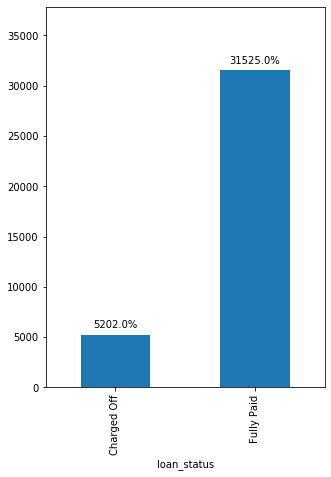

In [68]:
plt.figure(figsize=(5,7))
ax = loan_rangedf.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

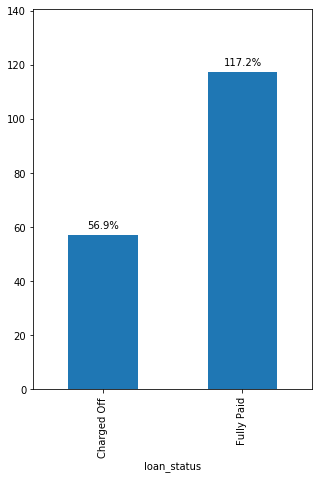

In [69]:
plt.figure(figsize=(5,7))
ax = (loan_rangedf.groupby('loan_status').total_pymnt.sum() * 100 / loan_rangedf.groupby('loan_status').loan_amnt.sum()).plot.bar()
plt.margins(0.2, 0.2)
showLabels(ax)

In [70]:
print("%.2f" % (loan_rangedf.loc[loan_rangedf['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan_rangedf)))

14.16


### 14.71% loans are defaulted.

In [71]:
print("%.2f" % (loan_rangedf.loc[loan_rangedf['loan_status'] == 'Charged Off'].loan_amnt.sum() * 100/loan_rangedf.funded_amnt.sum()))

16.00


### 16.82% funded loan amount is defaulted

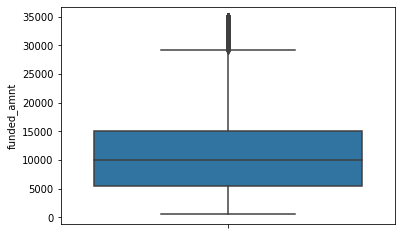

In [72]:
sns.boxplot( y=loan_df["funded_amnt"] )
plt.show()

### Variable: loan_amnt
Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [73]:
loan_rangedf['loan_amnt'].describe()

count    36727.000000
mean     11153.772429
std       7368.371590
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [74]:
loan_rangedf.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5202.0,12294.040754,8096.074341,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,31525.0,10965.614592,7224.125820,500.0,5500.0,9600.0,15000.0,35000.0


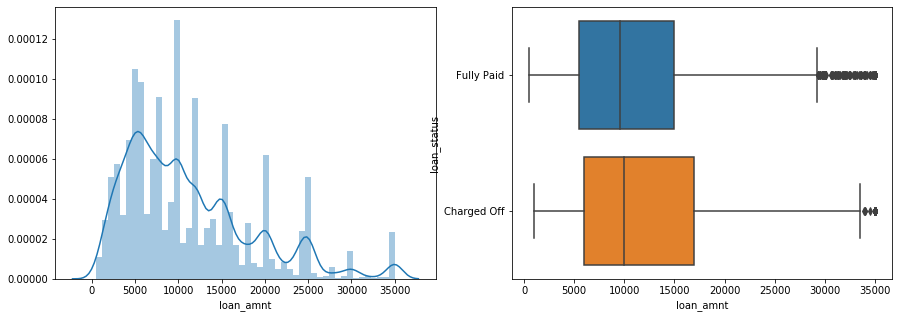

In [75]:
plot_dist(loan_rangedf,'loan_amnt')

### - Overall, the applied loan amount distribution is greater than the median.

In [76]:
loan_rangedf['loan_amnt_bin'] = pd.cut(loan_rangedf['loan_amnt'],[x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


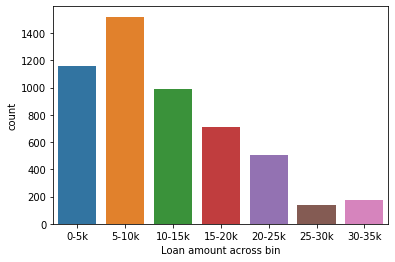

In [77]:
sns.countplot(x='loan_amnt_bin', data=loan_rangedf[loan_rangedf['loan_status']=='Charged Off'])
plt.xlabel('Loan amount across bin')
plt.show()

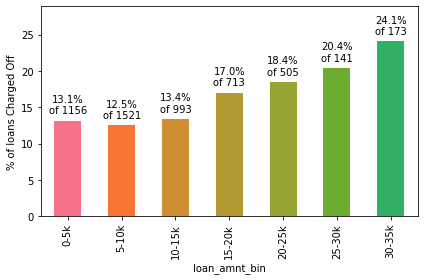

In [78]:
plotgroups(loan_rangedf, 'loan_amnt_bin','loan_status','Charged Off')

Higher number of loans are taken below 20,000. But the loan amount above 20k is also risk with less number of loans.

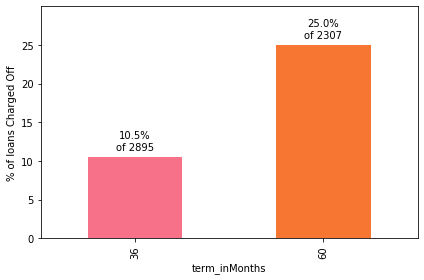

In [79]:
plotgroups(loan_rangedf, 'term_inMonths','loan_status','Charged Off')
plt.show()

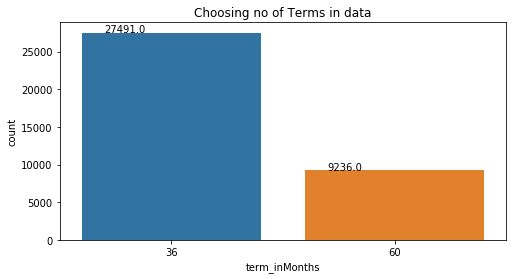

In [80]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="term_inMonths", data=loan_rangedf)
plt.title('Choosing no of Terms in data')
#plt.xlabel('Terms')
#plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [81]:
loan_rangedf.groupby('term_inMonths')['loan_status'].count()/len(loan_rangedf)*100

term_inMonths
36    74.852289
60    25.147711
Name: loan_status, dtype: float64

In [82]:
loan_rangedf[loan_rangedf['loan_status']=='Charged Off'].groupby('term_inMonths')['term_inMonths'].count()/len(loan_rangedf[loan_rangedf['loan_status']=='Charged Off'])*100

term_inMonths
36    55.651672
60    44.348328
Name: term_inMonths, dtype: float64

- 75% of the total loans are given for duration of 3 years than loans taken for 5 years that is 25%.
- Among Charged Off loans, percentage of term 60 months is more that is 44%. Out of Charged Off loans 

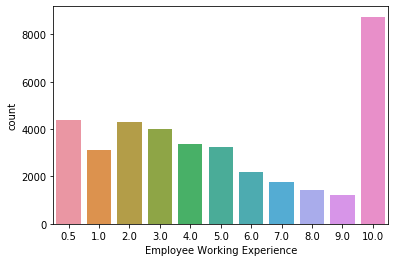

In [83]:
sns.countplot(x='emp_length_inYears', data=loan_df)
plt.xlabel('Employee Working Experience')
plt.show()

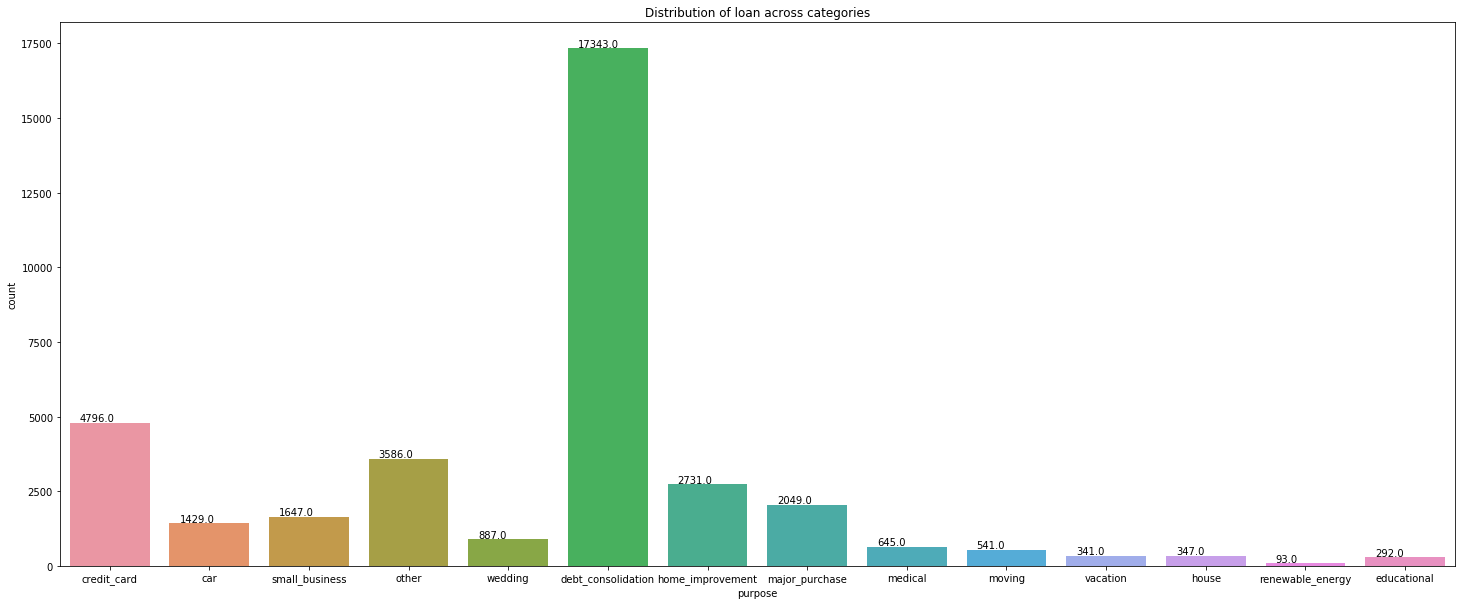

In [84]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x="purpose", data=loan_rangedf)
plt.title('Distribution of loan across categories')
#plt.xlabel('Terms')
#plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

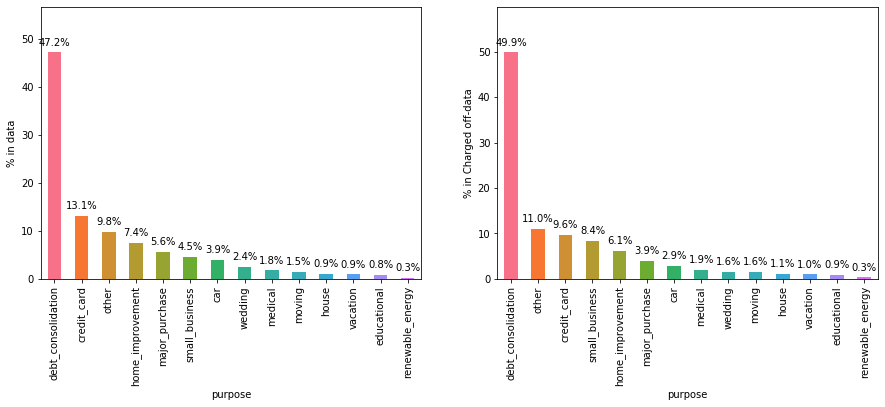

In [85]:
plt.figure(figsize=(15,5))
plt_colper(loan_rangedf,'purpose')

### In whole 48% of loan are taken for debt_conslidation,50% for Charged off loans are taken for debt_consolidation    

###  pub_rec_bankruptcy

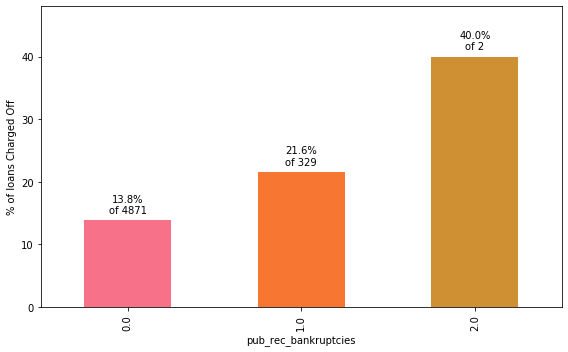

In [86]:
plt.figure(figsize=(8,5))
plotgroups(loan_rangedf, 'pub_rec_bankruptcies','loan_status','Charged Off')

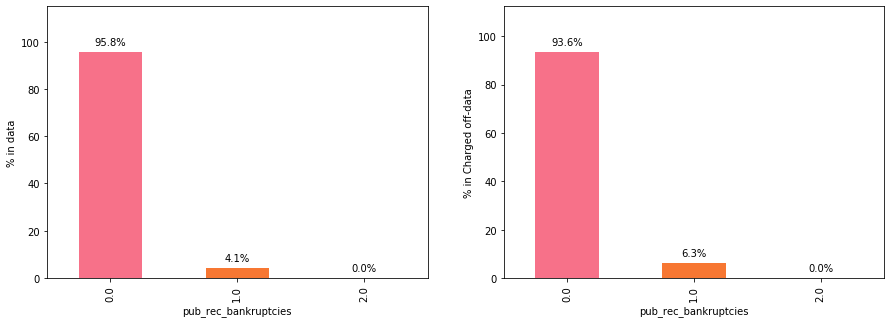

In [87]:
plt.figure(figsize=(15,5))
plt_colper(loan_rangedf,'pub_rec_bankruptcies')

Mostly 96% of loan takers have no bankruptancy filed- Even Charged Off also higher for no bankruptancy filed.
4.3% with 1 bankruptancy and 6.3% for Charged Off.
This variable doesnot have much addition to the analysis

### Int_rate

In [88]:
loan_rangedf['int_rate_%'].describe()

count    36727.000000
mean        11.979982
std          3.701048
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate_%, dtype: float64

In [89]:
loan_rangedf.groupby('loan_status')['int_rate_%'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5202.0,13.925054,3.656880,5.42,11.49,13.79,16.45,24.40
Fully Paid,31525.0,11.659022,3.608944,5.42,8.59,11.49,13.99,24.11


In [90]:
loan_rangedf['int_rate_%_bin'] = pd.cut(loan_rangedf['int_rate_%'],[x for x in range(0, 25,5)], labels=[str(x)+'-'+str(x+5) for x in range (0, 20,5)])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
#loan_rangedf.info()

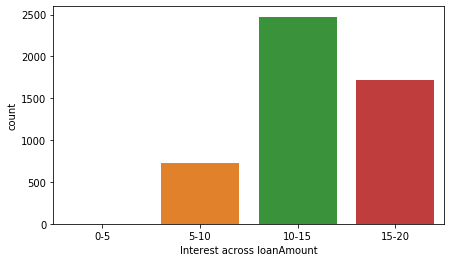

In [92]:
plt.figure(figsize=(7,4))
#plot_dist(loan_rangedf, 'int_rate_%_bin')countplot

ax = sns.countplot(x='int_rate_%_bin', data=loan_rangedf[loan_rangedf['loan_status']=='Charged Off'],)
plt.xlabel('Interest across loanAmount')
plt.show()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

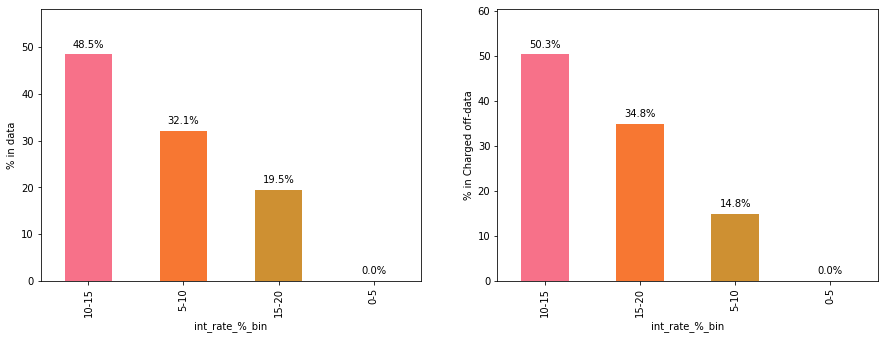

In [93]:
plt.figure(figsize=(15,5))
plt_colper(loan_rangedf,'int_rate_%_bin')

In [94]:
loan_rangedf['interest_rate_buckets'] = round(loan_rangedf['int_rate_%'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


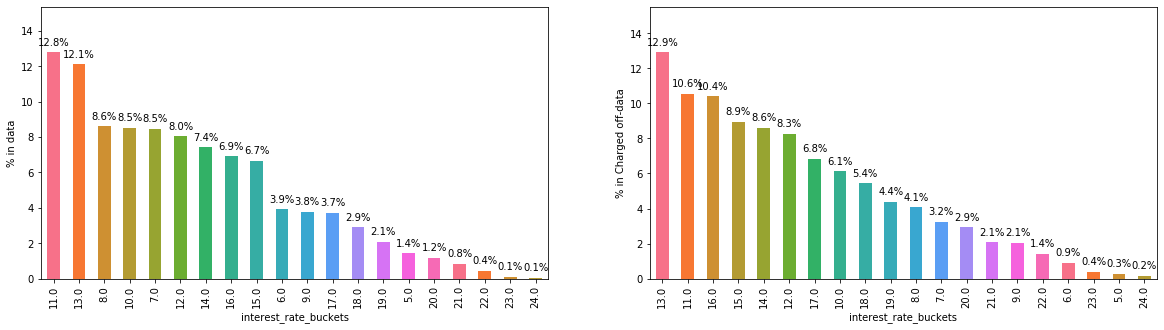

In [95]:
plt.figure(figsize=(20,5))
plt_colper(loan_rangedf,'interest_rate_buckets')

Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases.

### Installment

In [96]:
loan_rangedf['installment'].describe()

count    36727.000000
mean       325.014427
std        208.852376
min         16.080000
25%        167.730000
50%        280.410000
75%        429.450000
max       1305.190000
Name: installment, dtype: float64

In [97]:
loan_rangedf.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5202.0,339.548552,215.850095,22.79,172.38,297.53,460.10,1305.19
Fully Paid,31525.0,322.616124,207.580732,16.08,167.08,278.17,424.56,1295.21


<Figure size 1080x360 with 0 Axes>

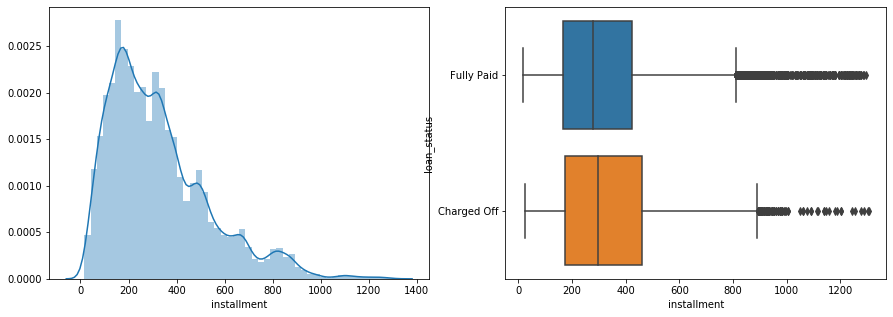

In [98]:
plt.figure(figsize=(15,5))
plot_dist(loan_rangedf, 'installment')

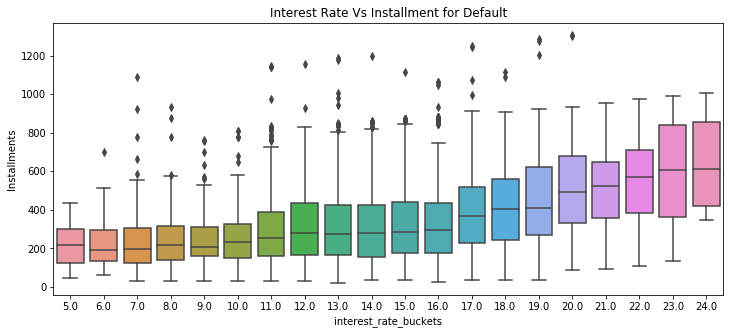

In [99]:
plt.figure(figsize=(12,5))
sns.boxplot(y='installment', x='interest_rate_buckets', data=loan_rangedf[loan_rangedf['loan_status']=='Charged Off'],order = sorted(loan_rangedf.interest_rate_buckets.unique()))
plt.ylabel('Installments')
plt.title('Interest Rate Vs Installment for Default')
plt.show()

- Installment amount varies largely between 167.34 to 422.01 with median of 260, loans Charged Off have high installment on average
- Installment increases with interest rate

### grade and sub_grade

In [100]:
loan_rangedf['grade'].value_counts()

B    11133
A     9511
C     7451
D     4836
E     2566
F      938
G      292
Name: grade, dtype: int64

In [101]:
loan_rangedf.sub_grade.value_counts(normalize=True).head()

A4    0.075204
B3    0.073733
A5    0.070738
B5    0.068451
B4    0.063659
Name: sub_grade, dtype: float64

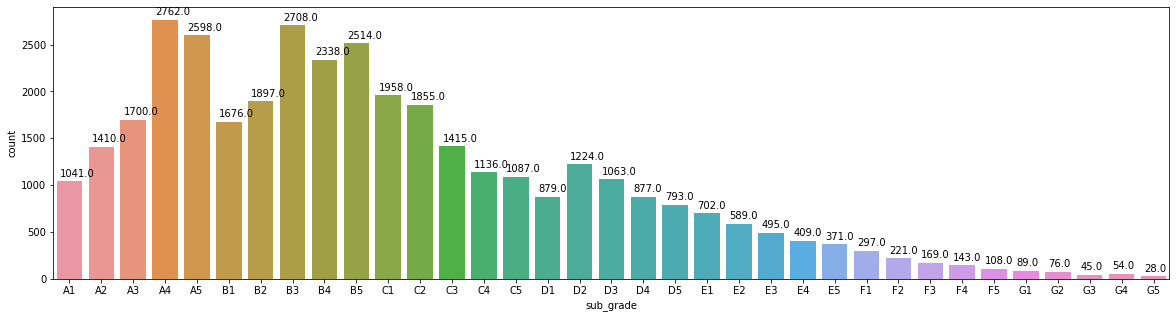

In [102]:
plt.figure(figsize=(20,5))
ax = sns.countplot(loan_rangedf['sub_grade'], order=sorted(loan_rangedf.sub_grade.unique()))
#plt.show()

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

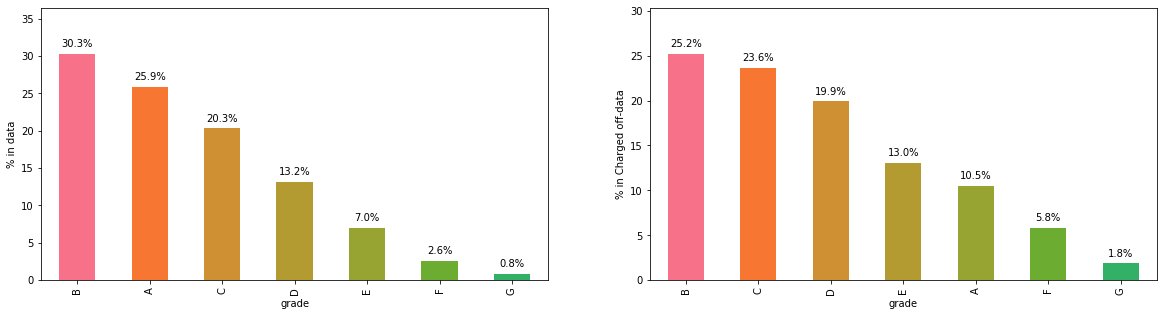

In [103]:
plt.figure(figsize=(20,5))
plt_colper(loan_rangedf,'grade')

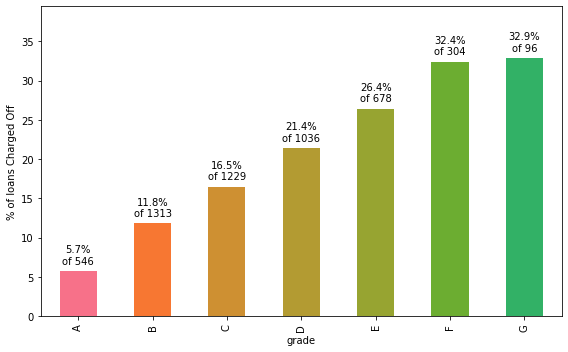

In [104]:
plt.figure(figsize=(8,5))
plotgroups(loan_rangedf, 'grade','loan_status','Charged Off')

- Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
- Grade D, E, F, G loans are less safe.
- Out of Charged-off ,nearly 30% of all loans in Grades F and G see a default.
- Grade E onwards are risky, and less probable to pay-off

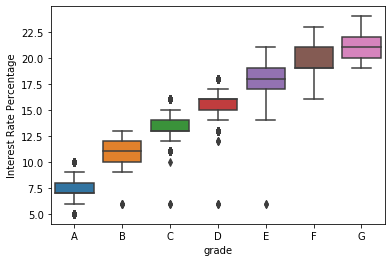

In [105]:
sns.boxplot(y='interest_rate_buckets', x='grade', data=loan_rangedf,order = sorted(loan_rangedf.grade.unique()))
plt.ylabel('Interest Rate Percentage')
plt.show()

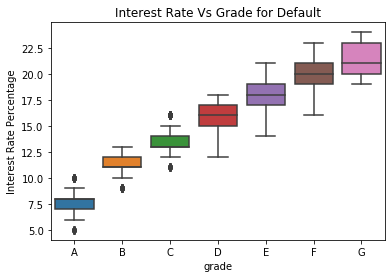

In [106]:
sns.boxplot(y='interest_rate_buckets', x='grade', data=loan_rangedf[loan_rangedf['loan_status']=='Charged Off'],order = sorted(loan_rangedf.grade.unique()))
plt.ylabel('Interest Rate Percentage')
plt.title('Interest Rate Vs Grade for Default')
plt.show()

Interest rate is higher for low grades. 

### emp_title


In [107]:
top10_emp_title = loan_rangedf[loan_rangedf['loan_status']=='Charged Off'].emp_title.value_counts(normalize=False).head(10)

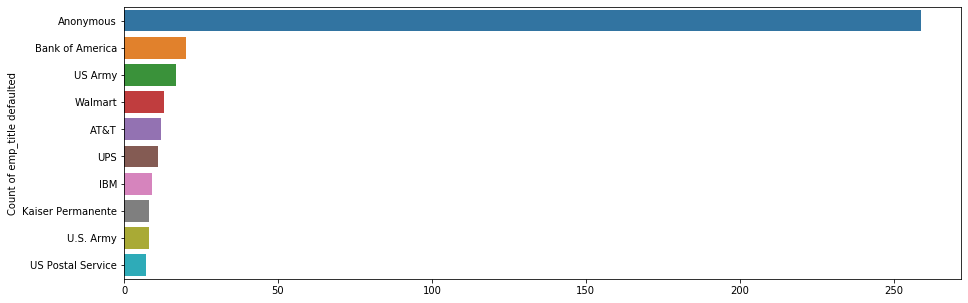

In [108]:
plt.figure(figsize=(15,5))
a=sns.barplot(y=top10_emp_title.index,x=top10_emp_title.values,orient='h')
a.set_ylabel('Count of emp_title defaulted')
plt.show()


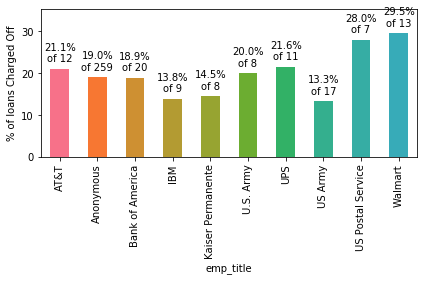

In [109]:
#emp_df = loan_rangedf[loan_rangedf['emp_title'].isin(top10_emp_title.index.values)]
plotgroups(loan_rangedf[loan_rangedf['emp_title'].isin(top10_emp_title.index.values)], 'emp_title','loan_status','Charged Off')
#ax = plotgroups(loan_rangedf, 'revol_util_bin','loan_status','Charged Off')

### Variable - emp_length
Data_Dictionary: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [110]:
loan_rangedf.emp_length_inYears.value_counts(normalize = True)

10.0    0.227571
0.5     0.117652
2.0     0.114248
3.0     0.107278
4.0     0.089335
5.0     0.085632
1.0     0.083345
6.0     0.058023
7.0     0.045852
8.0     0.038255
9.0     0.032810
Name: emp_length_inYears, dtype: float64

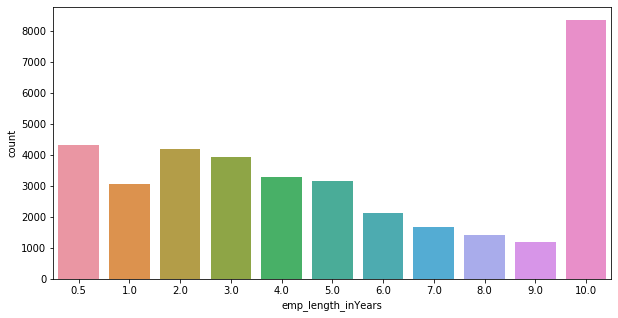

In [111]:
plt.figure(figsize=(10,5))
sns.countplot(loan_rangedf['emp_length_inYears'], order=sorted(loan_rangedf.emp_length_inYears.unique()))
plt.show()

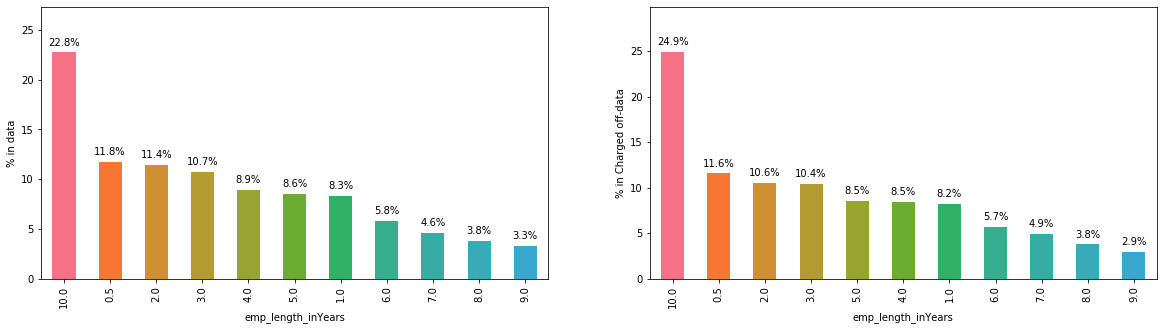

In [112]:
plt.figure(figsize=(20,5))
plt_colper(loan_rangedf,'emp_length_inYears')

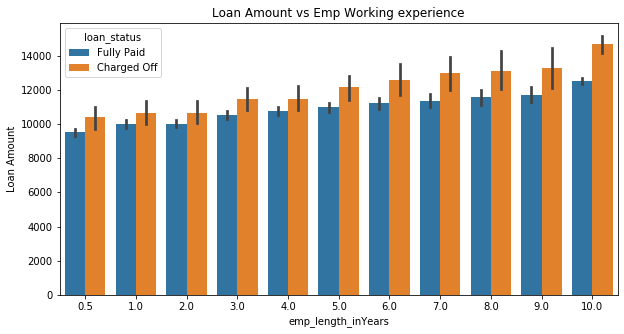

In [113]:
plt.figure(figsize=(10,5))
sns.barplot(y='loan_amnt', x='emp_length_inYears', hue='loan_status',data=loan_rangedf)
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Emp Working experience')
plt.show()

21.3% of loans are taken by employees in 10 or 10+ years. Maximum of it are defaulted to a 24.1% out of all the defaulters

### home_ownership

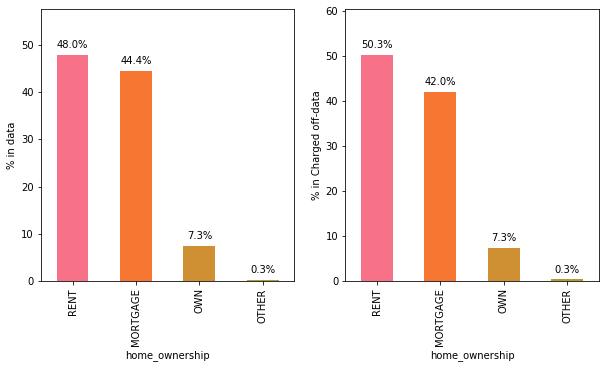

In [114]:
plt.figure(figsize=(10,5))
plt_colper(loan_rangedf,'home_ownership')

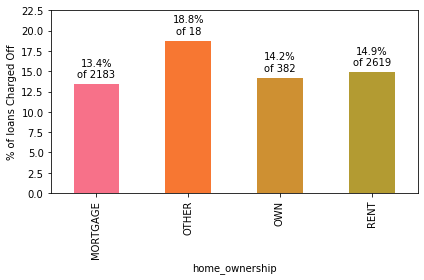

In [115]:
plotgroups(loan_rangedf, 'home_ownership','loan_status','Charged Off')

This parameter doesnot give much information has the defaulters and the total loan takers resembles same pattern

In [116]:
loan_rangedf.head()

,id,loan_amnt,funded_amnt,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,revol_util_%,emp_length_inYears,closed_acc,int_rate_%,term_inMonths,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,PayGap_inMons,Months_paid,PnL_%,loan_inc_ratio,loan_amnt_bin,int_rate_%_bin,interest_rate_buckets
0,1077501,5000,5000,162.87,B,B2,Anonymous,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,1985-01-01,1,3,0,13648,9,0.0,5863.155187,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,83.7,10.0,6,10.65,36,Dec,2011,Jan,1985,Jan,2015,May,2016,15.97,37.03,17.263104,20.833333,0-5k,10-15,11.0
1,1077430,2500,2500,59.83,C,C4,Ryder,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,4,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,9.4,0.5,1,15.27,60,Dec,2011,Apr,1999,Apr,2013,Sep,2013,5.03,16.00,-59.651600,8.333333,0-5k,15-20,15.0
2,1077175,2400,2400,84.33,C,C5,Anonymous,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0,2001-11-01,2,2,0,2956,10,0.0,3005.666844,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,98.5,10.0,8,15.96,36,Dec,2011,Nov,2001,Jun,2014,May,2016,23.00,30.00,25.236119,19.588639,0-5k,15-20,16.0
3,1076863,10000,10000,339.31,C,C1,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,37,0.0,12231.890000,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,21.0,10.0,27,13.49,36,Dec,2011,Feb,1996,Jan,2015,Apr,2016,14.98,37.03,22.318900,20.325203,5-10k,10-15,13.0
5,1075269,5000,5000,156.46,A,A4,Veolia Transportaton,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,12,0.0,5632.210000,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,28.3,3.0,3,7.90,36,Dec,2011,Nov,2004,Jan,2015,Jan,2016,11.99,37.03,12.644200,13.888889,0-5k,5-10,8.0


### annual_inc

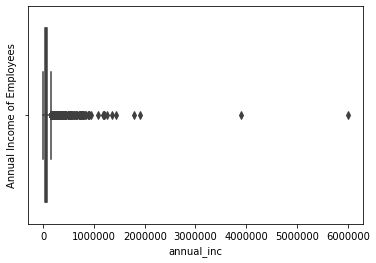

In [117]:
# annual income of the employee
sns.boxplot( x=loan_rangedf["annual_inc"] )
plt.ylabel('Annual Income of Employees')
plt.show()

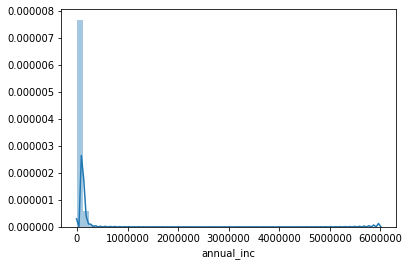

In [118]:
sns.distplot(loan_rangedf['annual_inc'])
plt.show()

In [119]:
loan_rangedf["annual_inc"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.672700e+04
mean     6.947194e+04
std      6.406963e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.120000e+04
50%      6.000000e+04
75%      8.300000e+04
90%      1.170000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

- The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000.
- Median annual income is around 64,000
- Most people have an annual income less than 117000

In [120]:
df = loan_rangedf[np.abs(loan_rangedf.annual_inc-loan_rangedf.annual_inc.mean()) <= (3*loan_rangedf.annual_inc.std())]

In [121]:
df["annual_inc"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count     36460.000000
mean      66537.722857
std       36343.676663
min        4000.000000
10%       30000.000000
25%       41000.000000
50%       59800.000000
75%       82000.000000
90%      114059.300000
max      260735.000000
Name: annual_inc, dtype: float64

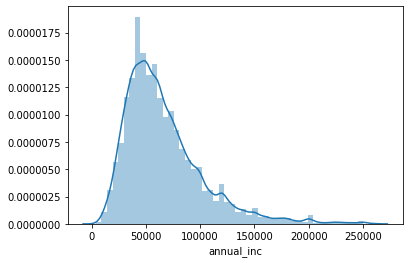

In [122]:
sns.distplot(df['annual_inc'])
plt.show()

In [123]:
loan_rangedf['income_bin'] = pd.cut(loan_rangedf['annual_inc'], [x for x in range(0, 270000, 20000)], labels=[str(x)+'-'+str(x+2)+'k' for x in range (0, 26, 2)])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


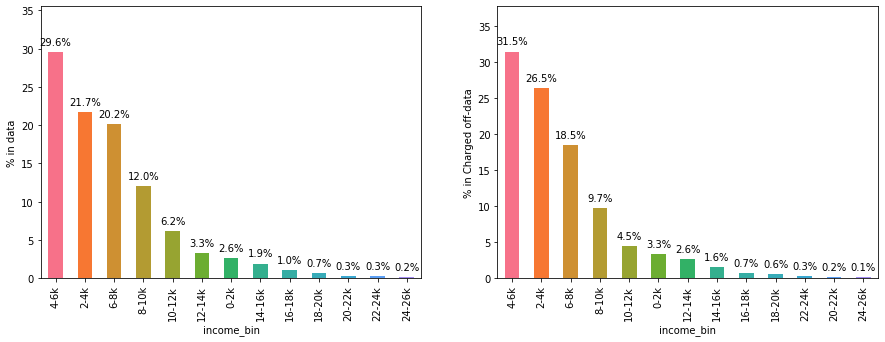

In [124]:
plt.figure(figsize=(15,5))
plt_colper(loan_rangedf,'income_bin')

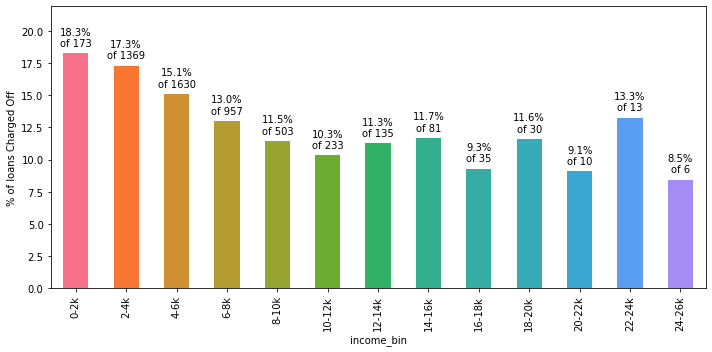

In [125]:
plt.figure(figsize=(10,5))
plotgroups(loan_rangedf, 'income_bin','loan_status','Charged Off')
plt.show()

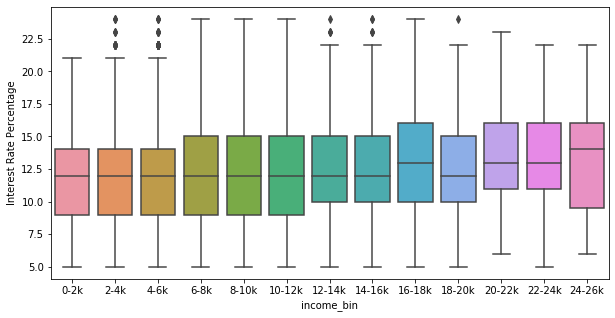

In [126]:
plt.figure(figsize=(10,5))
sns.boxplot(y='interest_rate_buckets', x='income_bin', data=loan_rangedf)
plt.ylabel('Interest Rate Percentage')
plt.show()

### verification_status


In [127]:
loan_rangedf['verification_status'].value_counts()

Not Verified       15517
Verified           11744
Source Verified     9466
Name: verification_status, dtype: int64

- Loans 'Verified' and 'Source Verified' status both imply that LC has cross checked the income value specified by the borrower and thus both statuses can be treated as one.

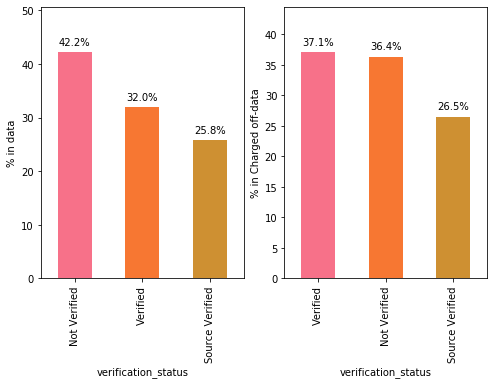

In [128]:
plt.figure(figsize=(8,5))
plt_colper(loan_rangedf,'verification_status')

Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.

###  issue_d


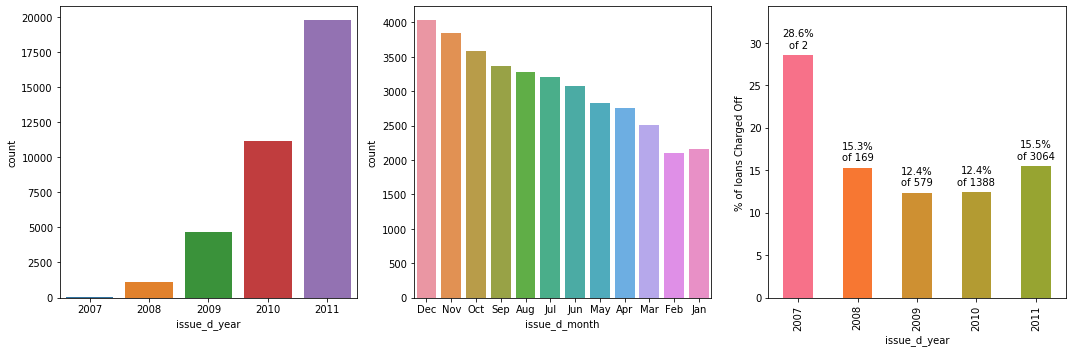

In [129]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(loan_rangedf['issue_d_year'], order=sorted(loan_rangedf.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(loan_rangedf['issue_d_month'])

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotgroups(loan_rangedf, 'issue_d_year','loan_status','Charged Off')

plt.show()

- Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
- The number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year?Year of loan has no significant effect on likelihood of default.

###  title


In [130]:
del loan_rangedf['title']

### addr_state


In [131]:
loan_rangedf.addr_state.value_counts(normalize=True).head(10)

CA    0.181311
NY    0.095352
FL    0.071773
TX    0.069322
NJ    0.047023
IL    0.038854
PA    0.038745
VA    0.035478
GA    0.035178
MA    0.033463
Name: addr_state, dtype: float64

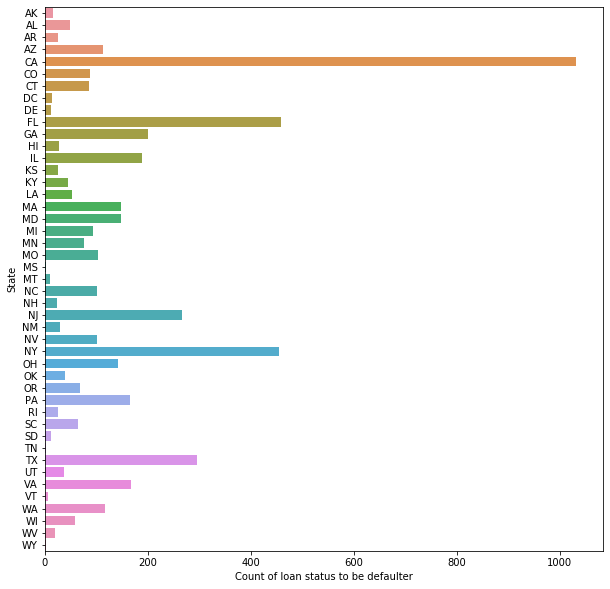

In [132]:
g = loan_rangedf[loan_rangedf['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

Applicants from the state CA are having high probability to be default

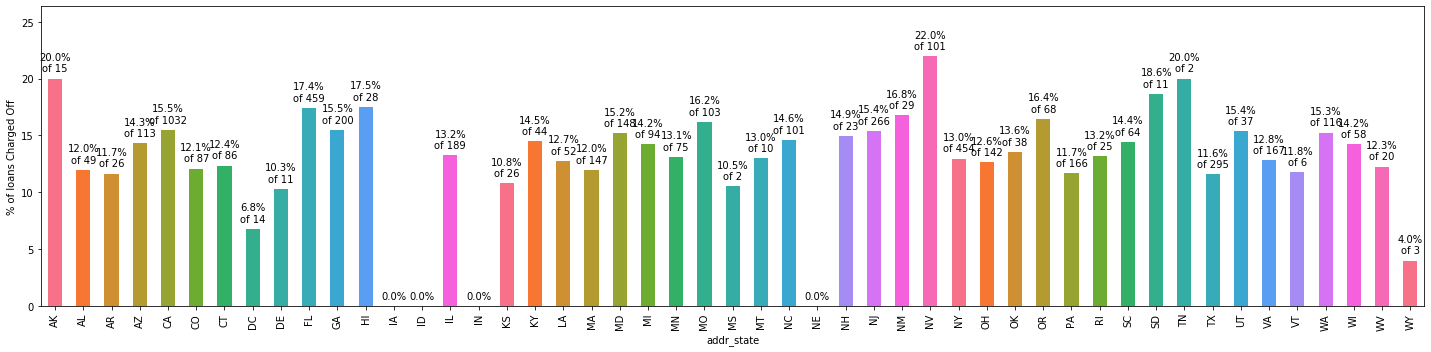

In [133]:
plt.figure(figsize=(20,5))
plotgroups(loan_rangedf, 'addr_state','loan_status','Charged Off')
plt.show()

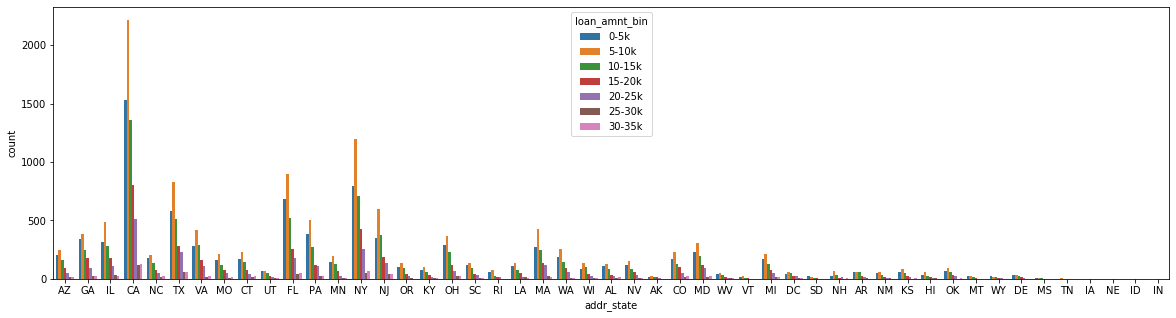

In [134]:
plt.figure(figsize=(20,5))
sns.countplot(loan_rangedf['addr_state'],hue=loan_rangedf['loan_amnt_bin'],orient='v')

#### Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
#### States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default.

### dti

In [135]:
loan_rangedf.dti.describe()

count    36727.000000
mean        13.337557
std          6.649275
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

The dti index varies from min 0 to max of 30. The median dti is of 13.5

<Figure size 1080x360 with 0 Axes>

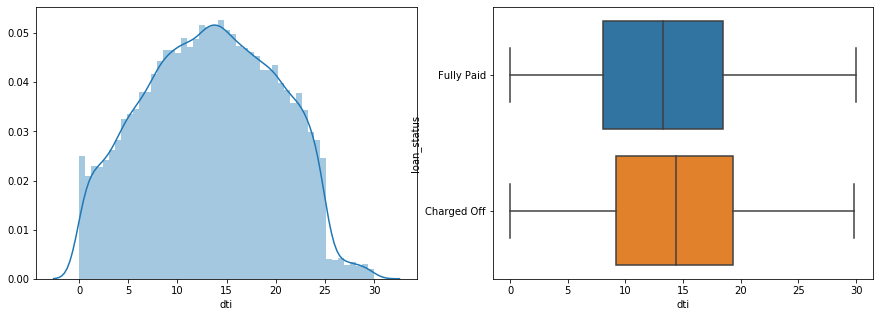

In [136]:
plt.figure(figsize=(15,5))
plot_dist(loan_rangedf,'dti')

In [137]:
# Create derived variable 
loan_rangedf['dti_bin'] = pd.cut(loan_rangedf['dti'], [x for x in range(0, 35, 5)], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


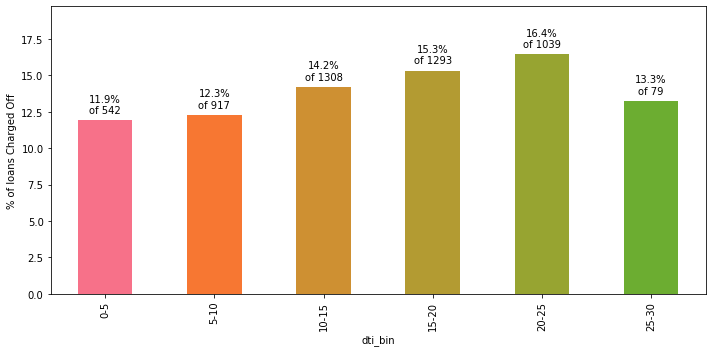

In [138]:
plt.figure(figsize=(10,5))
plotgroups(loan_rangedf, 'dti_bin','loan_status','Charged Off')
plt.show()

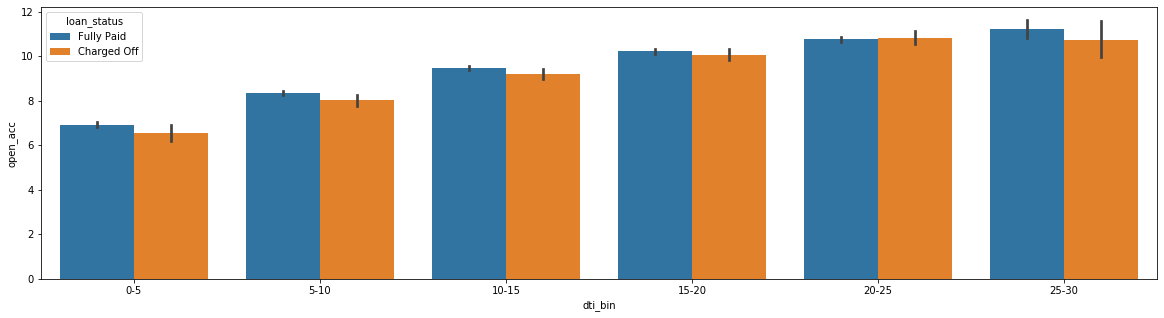

In [139]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=loan_rangedf, estimator=np.mean)
plt.show()

Higher the dti higher the chances of loan being Charged Off

### delinq_2yrs


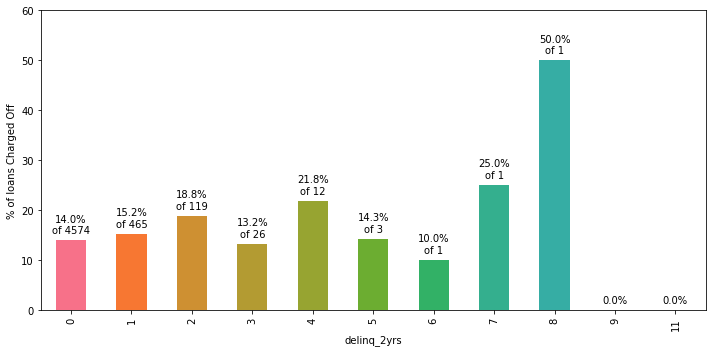

In [140]:
plt.figure(figsize=(10,5))
plotgroups(loan_rangedf, 'delinq_2yrs','loan_status','Charged Off')
plt.show()

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
There are higher chances of default if this variable is greater than 1.

###  revol_bal

In [141]:
# revol_balance
loan_rangedf['revol_bal'].describe()

count     36727.000000
mean      13386.726958
std       15857.420519
min           0.000000
25%        3735.000000
50%        8881.000000
75%       17040.000000
max      149588.000000
Name: revol_bal, dtype: float64

The revolving bal varies from min 0 to max of 150,000. The median revol_bal is of ~8900.

In [142]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'. -- normal distribution mean+3q/-3q
loan_rangedf1 = loan_rangedf[np.abs(loan_rangedf.revol_bal-loan_rangedf.revol_bal.mean()) <= (3*loan_rangedf.revol_bal.std())]
#loan_rangedf = loan_rangedf[~(loan_rangedf['loan_status']=='Current')]

In [143]:
loan_rangedf.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5202.0,13725.102845,15164.521685,0.0,4180.25,9480.5,17731.75,147365.0
Fully Paid,31525.0,13330.890912,15968.410153,0.0,3667.00,8799.0,16916.00,149588.0


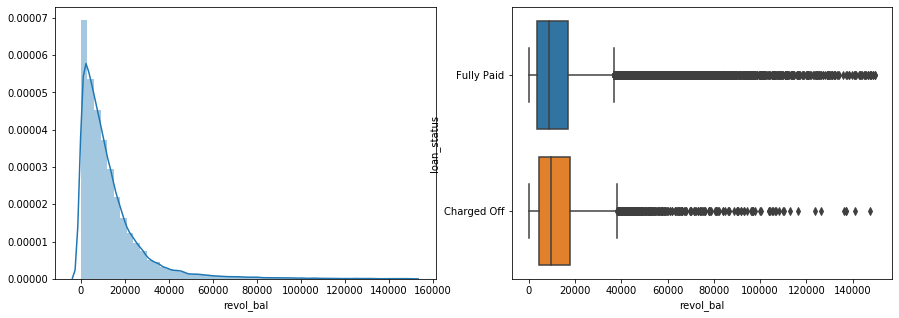

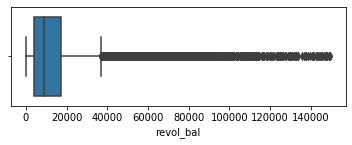

In [144]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(loan_rangedf['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loan_rangedf['revol_bal'], y=loan_rangedf['loan_status'], data=loan_rangedf)
#sns.barplot(x='loan_status', y='annual_inc_log',data= master_loan)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=loan_rangedf['revol_bal'], data=loan_rangedf)
plt.show()

Loan status is more much difference in mean, which paves way to analyse default/charge-off to customers

### revol_util

In [145]:
loan_rangedf.groupby('loan_status')['revol_util_%'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5202.0,55.999002,27.803170,0.0,35.0,59.2,79.2,99.9
Fully Paid,31525.0,47.836585,28.228597,0.0,24.3,48.0,71.1,99.9


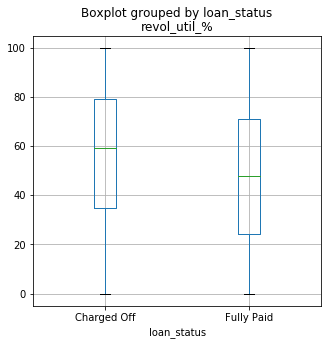

In [146]:
fig, ax = plt.subplots(figsize=(5,5))
loan_rangedf.boxplot(column=['revol_util_%'],by='loan_status', ax=ax)

In [147]:
loan_rangedf['revol_util_bin'] = round(loan_rangedf['revol_util_%']/5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


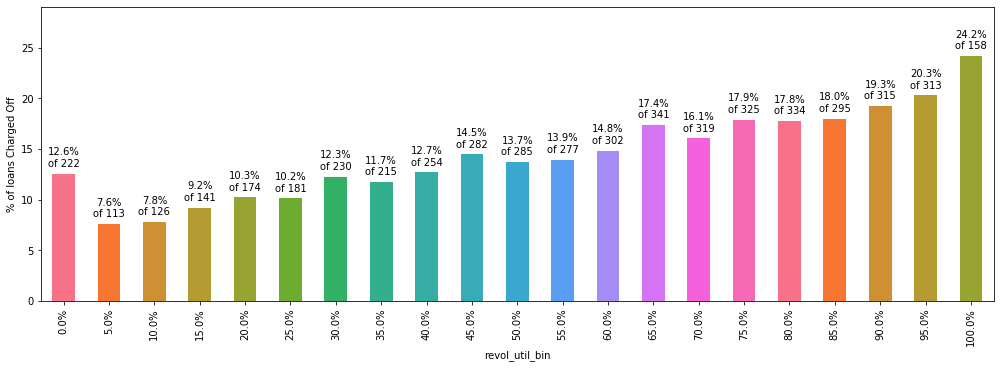

In [148]:
plt.figure(figsize=(14,5))
ax = plotgroups(loan_rangedf, 'revol_util_bin','loan_status','Charged Off')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

### total_acc

In [149]:
loan_rangedf.groupby(by='loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5202.0,21.651672,11.459188,2.0,13.0,20.0,29.0,74.0
Fully Paid,31525.0,22.248025,11.396394,3.0,14.0,21.0,29.0,90.0


<Figure size 1080x360 with 0 Axes>

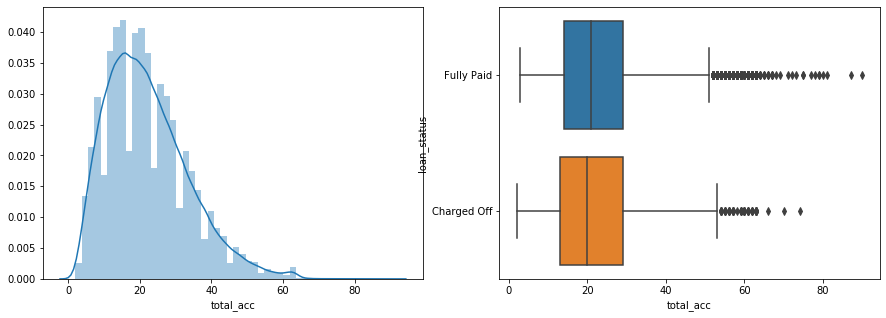

In [150]:
plt.figure(figsize=(15,5))
plot_dist(loan_rangedf, 'total_acc')
plt.show()

<Figure size 1080x360 with 0 Axes>

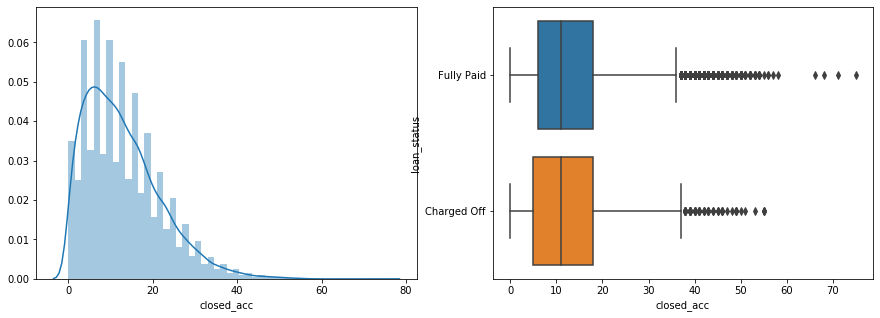

In [151]:
plt.figure(figsize=(15,5))
plot_dist(loan_rangedf, 'closed_acc')
plt.show()

Total 

### out_prncp

In [152]:
loan_rangedf.groupby('loan_status')['out_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,31525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ingnored for analysis. Therefore out_prncp variable can be removed or droped.

###  total_pymnt

In [153]:
loan_rangedf.groupby('loan_status').total_pymnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5202.0,6996.822362,6670.175901,33.73000,2324.782500,4964.23000,9405.23000,51745.45000
Fully Paid,31525.0,12849.675878,8890.715656,578.76814,6228.866469,10813.89584,17152.03621,58563.67993


There is quite a difference between the standard deviation/mean bewteen loan_status. Using normal distribuition analyse the 68% i.e.+/- 3q

In [154]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
loan_rangedf = loan_rangedf[np.abs(loan_rangedf.total_pymnt-loan_rangedf.total_pymnt.mean()) <= (3*loan_rangedf.total_pymnt.std())]

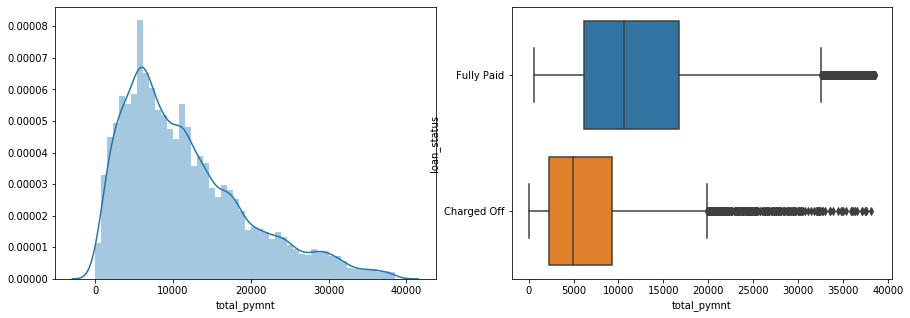

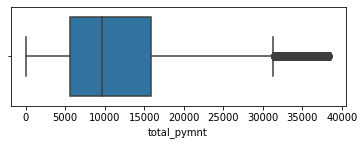

In [155]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(loan_rangedf['total_pymnt'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loan_rangedf['total_pymnt'], y=loan_rangedf['loan_status'], data=loan_rangedf)
#sns.barplot(x='loan_status', y='annual_inc_log',data= master_loan)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=loan_rangedf['total_pymnt'], data=loan_rangedf)
plt.show()

Observation:

- The average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.
- This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [156]:
#Drop the columns
loan_rangedf = loan_rangedf.drop(['total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'],axis=1)

In [157]:
loan_rangedf.shape

(36158, 50)

### last_pymnt_d


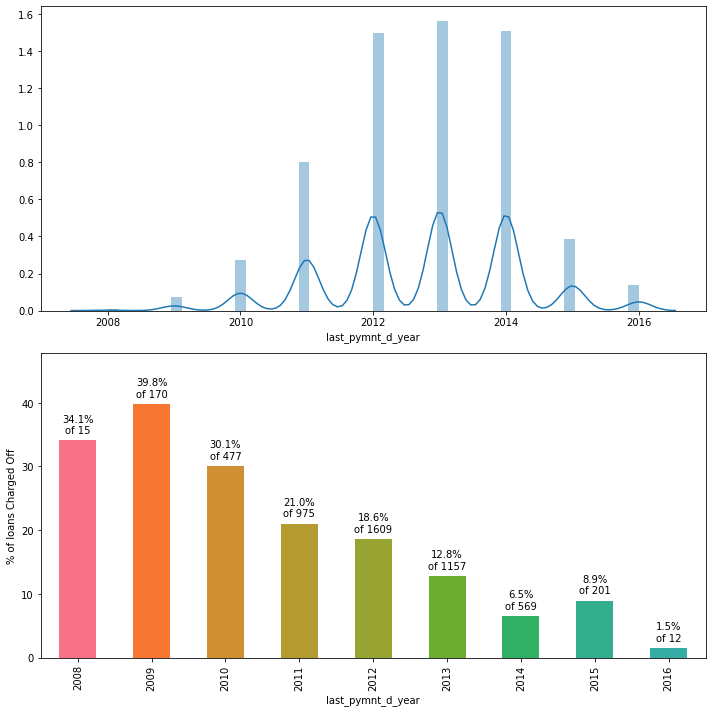

In [158]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
#sns.countplot(master_loan['earliest_cr_line_year'], order=sorted(master_loan.issue_d_year.unique()))
sns.distplot(loan_rangedf['last_pymnt_d_year'])
#plt.subplot(1, 2, 2)
#sns.countplot(master_loan['earliest_cr_line_month'], order=sorted(master_loan.issue_d_month.unique()))
#plt.show()

plt.subplot(2, 1, 2)
plotgroups(loan_rangedf, 'last_pymnt_d_year','loan_status','Charged Off')
plt.show()

Observation:
Percentage is based on the total number of loans per year.
Overall, maximum of the last payment dates are during 2012-2014 period.
40% of loans with a last payment date of 2009 are Charged Off. 
This variable does not affect analysis and will be ignored as this value is not available during loan request and is very much inappropriate to analyse the results without the year's impacts. As 2020 - pandemic as such.

### last_pymnt_amnt

In [159]:
loan_rangedf.groupby(by='loan_status')['last_pymnt_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5185.0,330.625614,542.560406,0.01,120.05,242.62,407.08,12818.38
Fully Paid,30973.0,3054.689166,4511.989894,0.16,257.19,859.45,4174.13,36115.20


As expected the charge-off loan_status the last payment amount must be less than fully_paid.

### last_credit_pull_d

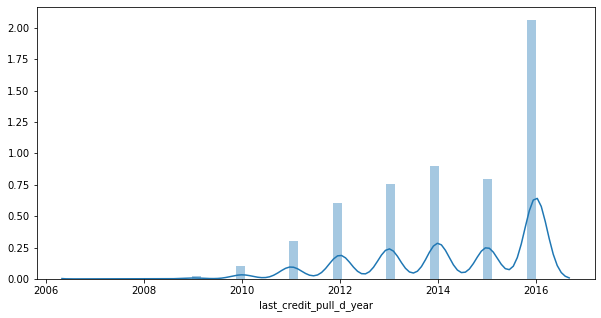

In [160]:
plt.figure(figsize=(10,5))
sns.distplot(loan_rangedf['last_credit_pull_d_year'])
#plot_dist(loan_rangedf,'last_credit_pull_d_year')
plt.show()

last_credit_pull_d i.e. credit reports is significantly increasing in 2016 and recent years to avoid risk of bad loans.
This variable can be ignored in our analysis.

###  earliest_cr_line

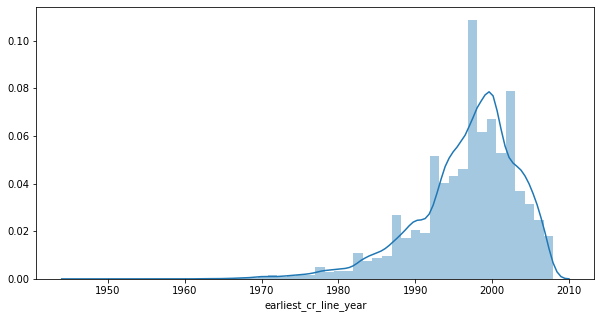

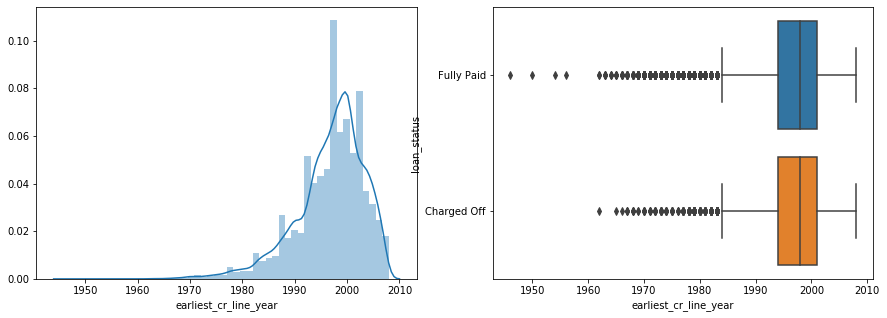

In [161]:
plt.figure(figsize=(10,5))
sns.distplot(loan_rangedf['earliest_cr_line_year'])
plot_dist(loan_rangedf,'earliest_cr_line_year')
plt.show()

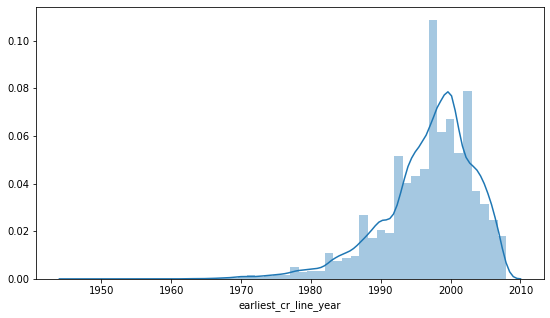

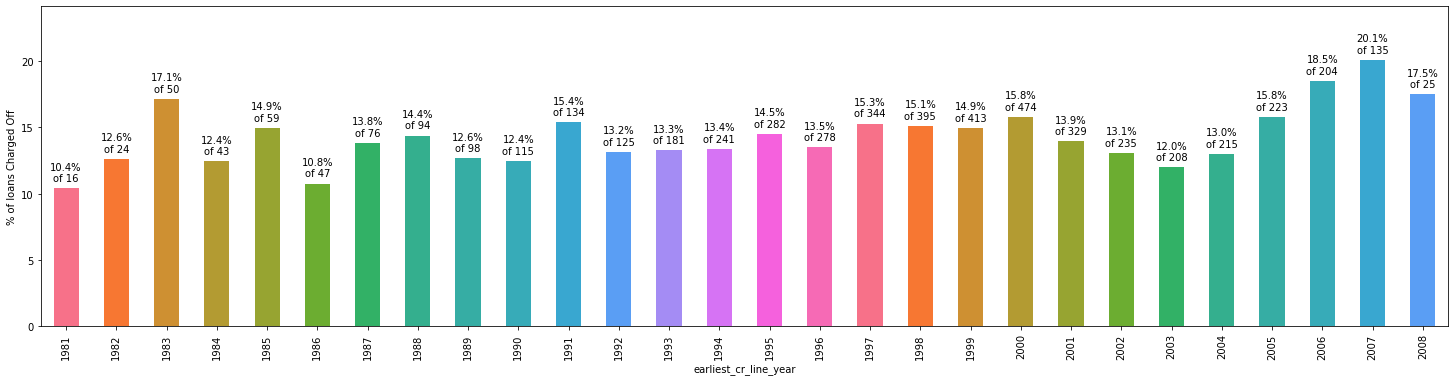

In [162]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

sns.distplot(loan_rangedf['earliest_cr_line_year'])

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotgroups(loan_rangedf.loc[loan_rangedf['earliest_cr_line_year'] > 1980], 'earliest_cr_line_year','loan_status','Charged Off') # just taking few years to analysis
plt.show()

In [163]:
loan_rangedf.earliest_cr_line_year.value_counts(normalize=True).head(15)

2000    0.083107
1999    0.076470
1998    0.072432
2001    0.065297
1997    0.062282
1996    0.056972
1995    0.053792
1994    0.049782
2002    0.049699
2003    0.047984
2004    0.045771
2005    0.039106
1993    0.037751
2006    0.030533
1992    0.026274
Name: earliest_cr_line_year, dtype: float64

From normalized data - 8% of the loan applicants have 2000 as the year of earliest credit line.
Top of list has mostly borrowers from range ~1990 to recent
Newer borrowers of that time too defaulted more often. In general, those who take their first loans at times of unexpected ups and downs of the market.
But this variable can be ignored in our analysis as it is very unpredictive

### inq_last_6mths


In [164]:
loan_rangedf['inq_last_6mths'].value_counts(normalize=True)

0    0.485812
1    0.276702
2    0.146192
3    0.076995
4    0.007937
5    0.003706
6    0.001466
7    0.000857
8    0.000332
Name: inq_last_6mths, dtype: float64

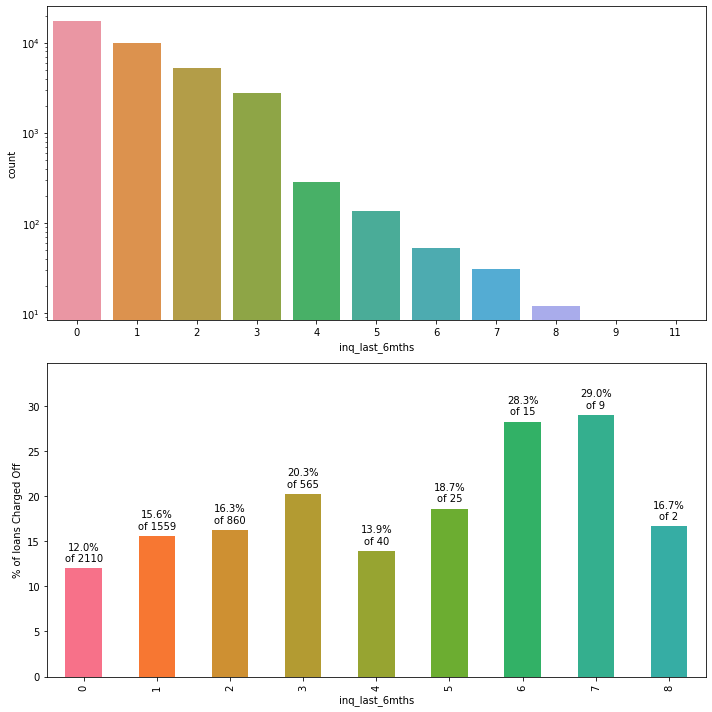

In [165]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(loan_rangedf['inq_last_6mths'], order=sorted(loan_rangedf.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotgroups(loan_rangedf, 'inq_last_6mths','loan_status','Charged Off')
plt.show()

- 48.5% of the borrowers do not make any inquiry
- No of defaulted loans are more if there 2 or more injuries.This is probably correlated to having more loans and can be ignored. 

###  pub_rec

In [166]:
loan_rangedf['pub_rec'].value_counts(normalize=True)

0    0.947149
1    0.051386
2    0.001217
3    0.000194
4    0.000055
Name: pub_rec, dtype: float64

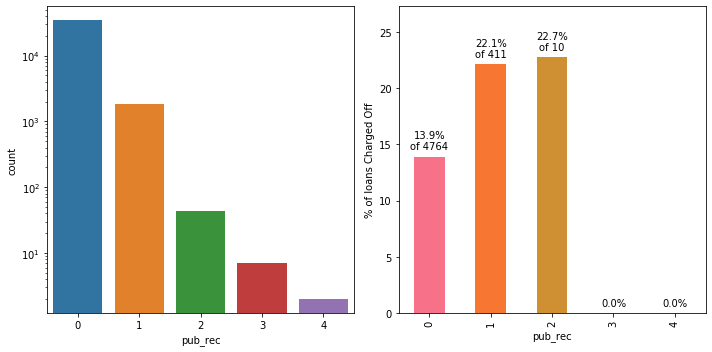

In [167]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
c=sns.countplot(loan_rangedf['pub_rec'], order=sorted(loan_rangedf.pub_rec.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotgroups(loan_rangedf, 'pub_rec','loan_status','Charged Off')
plt.show()

### 94% have no Public derogatory records. 5% have 1 derogatory record.
### Having even 1 derogatory record increases the chances of Charge Off. 

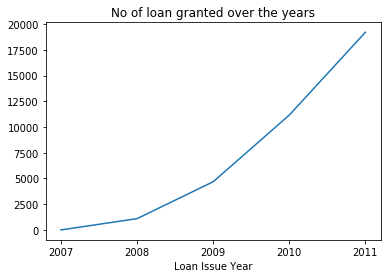

In [168]:
g = loan_rangedf.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

### delinq_2yr VS loan amount VS grade

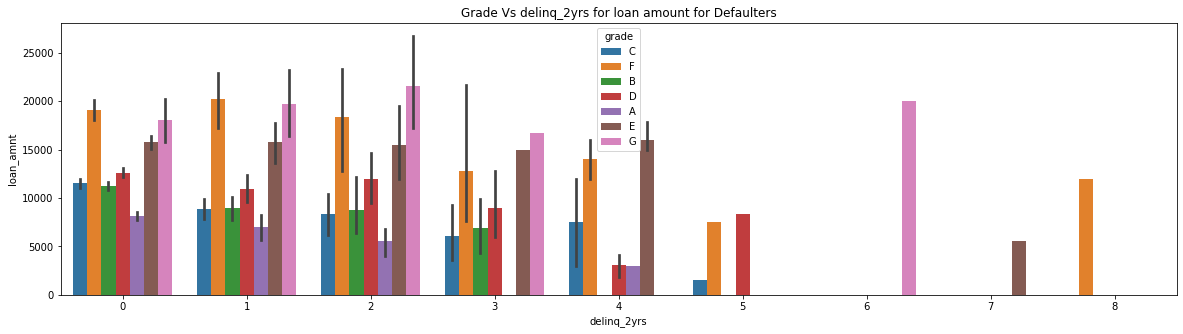

In [169]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=loan_rangedf[loan_rangedf['loan_status'] == 'Charged Off'], estimator=np.mean)
plt.title('Grade Vs delinq_2yrs for loan amount for Defaulters')
plt.show()

### Interest Rate Vs Grade Vs SubGrade

<Figure size 2520x1440 with 0 Axes>

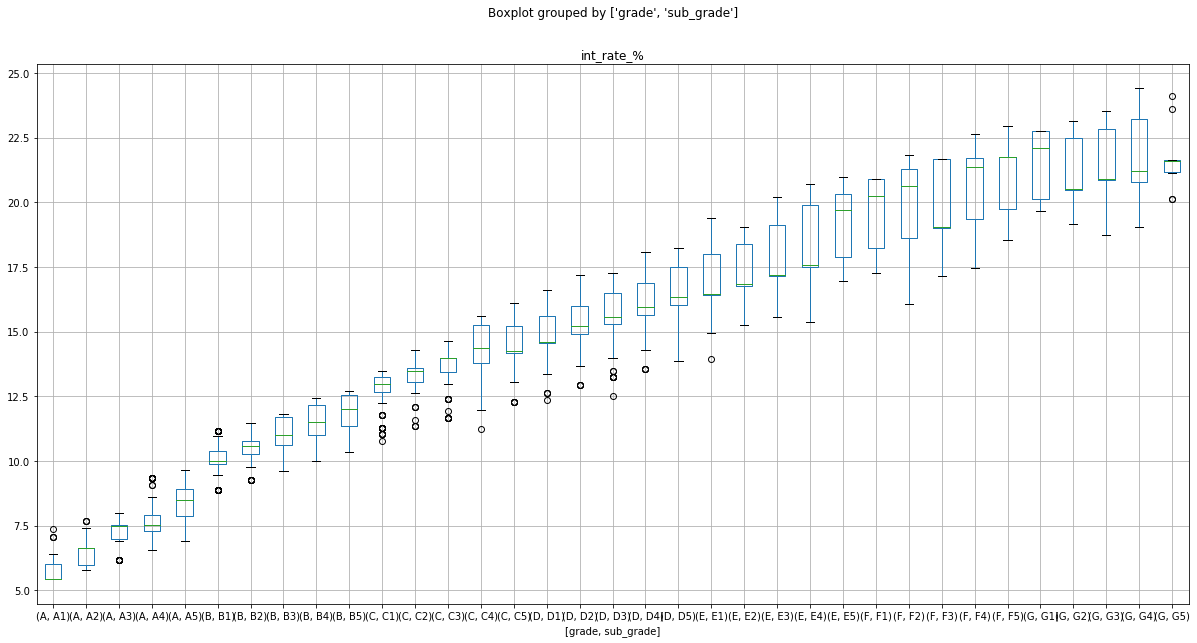

In [170]:
plt.figure(figsize=(35,20))
ax = loan_rangedf[loan_rangedf['loan_status'] == 'Charged Off'].boxplot(column='int_rate_%', by=['grade','sub_grade'],figsize=(20,10),return_type='axes')
#ax.title('IntRate Vs Grade Vs Subgrade')
plt.show()

### delinq_2yr VS int_rate VS loan_status

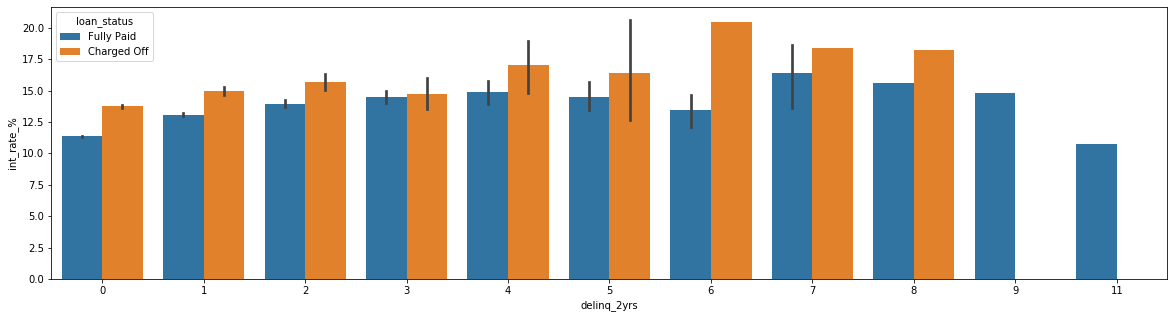

In [171]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate_%', hue='loan_status',data=loan_rangedf, estimator=np.mean)
plt.show()

### Revol_util Vs Grade Vs Loan status

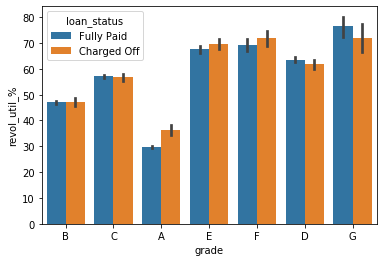

In [172]:
sns.barplot(x='grade', y='revol_util_%', hue="loan_status", data=loan_rangedf, estimator=np.mean)
plt.show()

### loanRatio to Income Vs purpose

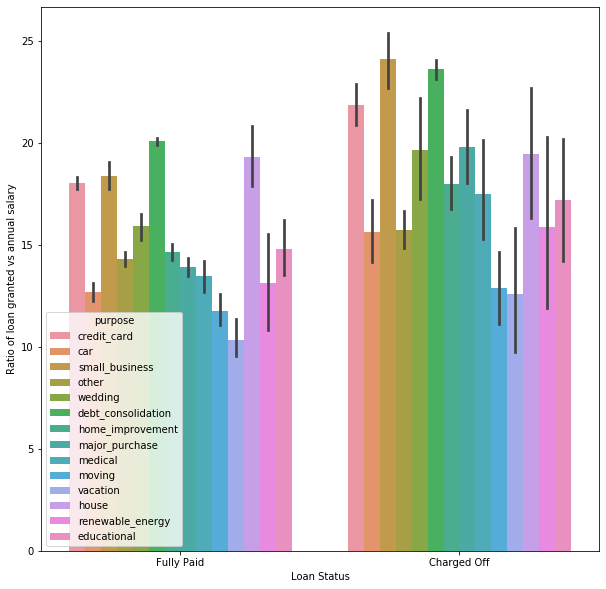

In [173]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=loan_df[~(loan_df['loan_status']=='Current')])
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

### Terms to purpose 

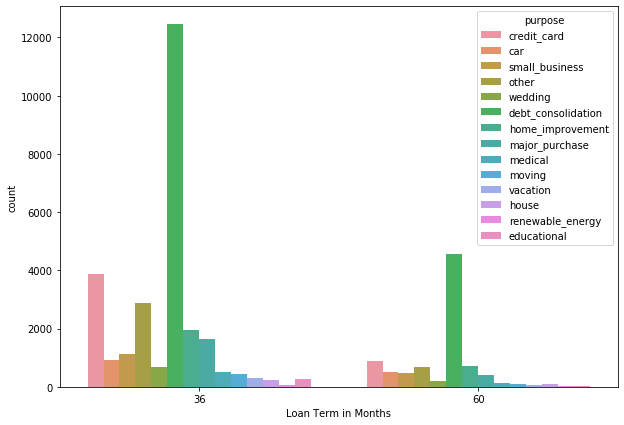

In [174]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_inMonths", hue='purpose', data=loan_rangedf)
plt.xlabel('Loan Term in Months')
plt.show()

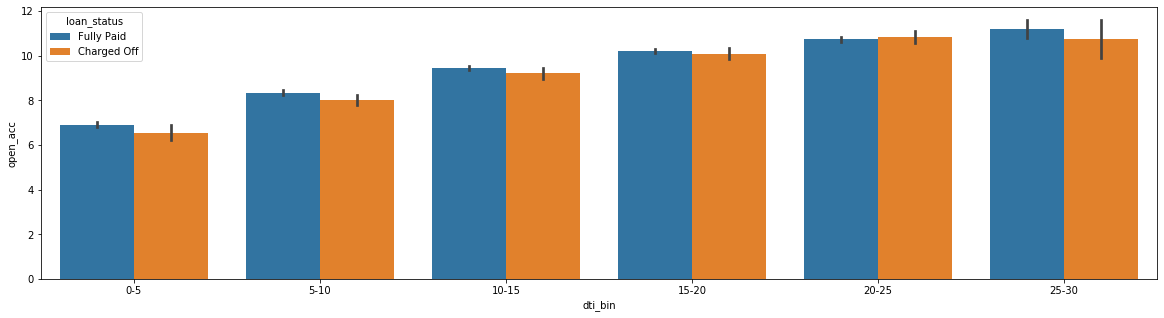

In [175]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=loan_rangedf, estimator=np.mean)
plt.show()

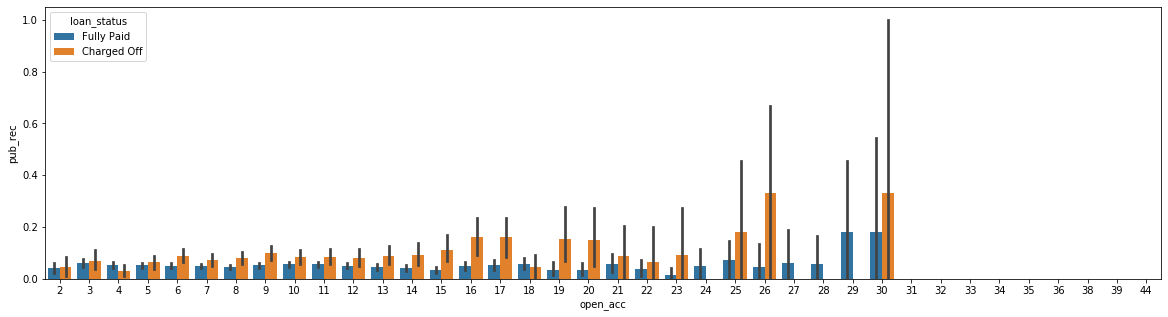

In [176]:
plt.figure(figsize=(20,5))
sns.barplot(x='open_acc', y='pub_rec', hue='loan_status',data=loan_rangedf, estimator=np.mean)
plt.show()

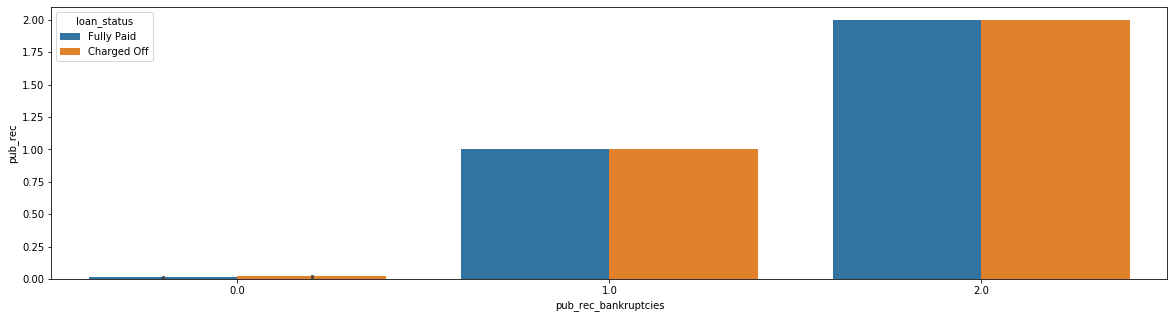

In [177]:
plt.figure(figsize=(20,5))
sns.barplot(x='pub_rec_bankruptcies', y='pub_rec', hue='loan_status',data=loan_rangedf, estimator=np.mean)
plt.show()

In [178]:
df_final = loan_rangedf

In [179]:
df_final = df_final.drop(['open_acc','PnL_%','PayGap_inMons','open_acc','total_acc','closed_acc','last_pymnt_amnt','out_prncp','last_pymnt_amnt','last_pymnt_d_year',],axis=1)

In [180]:
df_final.shape

(36158, 42)

In [181]:
corr=df_final.corr()
corr['loan_amnt']

id                         0.093395
loan_amnt                  1.000000
funded_amnt                0.978636
installment                0.924935
annual_inc                 0.246357
dti                        0.062681
delinq_2yrs               -0.039094
inq_last_6mths             0.008186
pub_rec                   -0.043273
revol_bal                  0.298759
pub_rec_bankruptcies      -0.027043
revol_util_%               0.058630
emp_length_inYears         0.141546
int_rate_%                 0.272085
term_inMonths              0.323795
issue_d_year               0.086033
earliest_cr_line_year     -0.184339
last_credit_pull_d_year    0.038536
Months_paid                0.002126
loan_inc_ratio             0.580761
interest_rate_buckets      0.272168
revol_util_bin             0.058238
Name: loan_amnt, dtype: float64

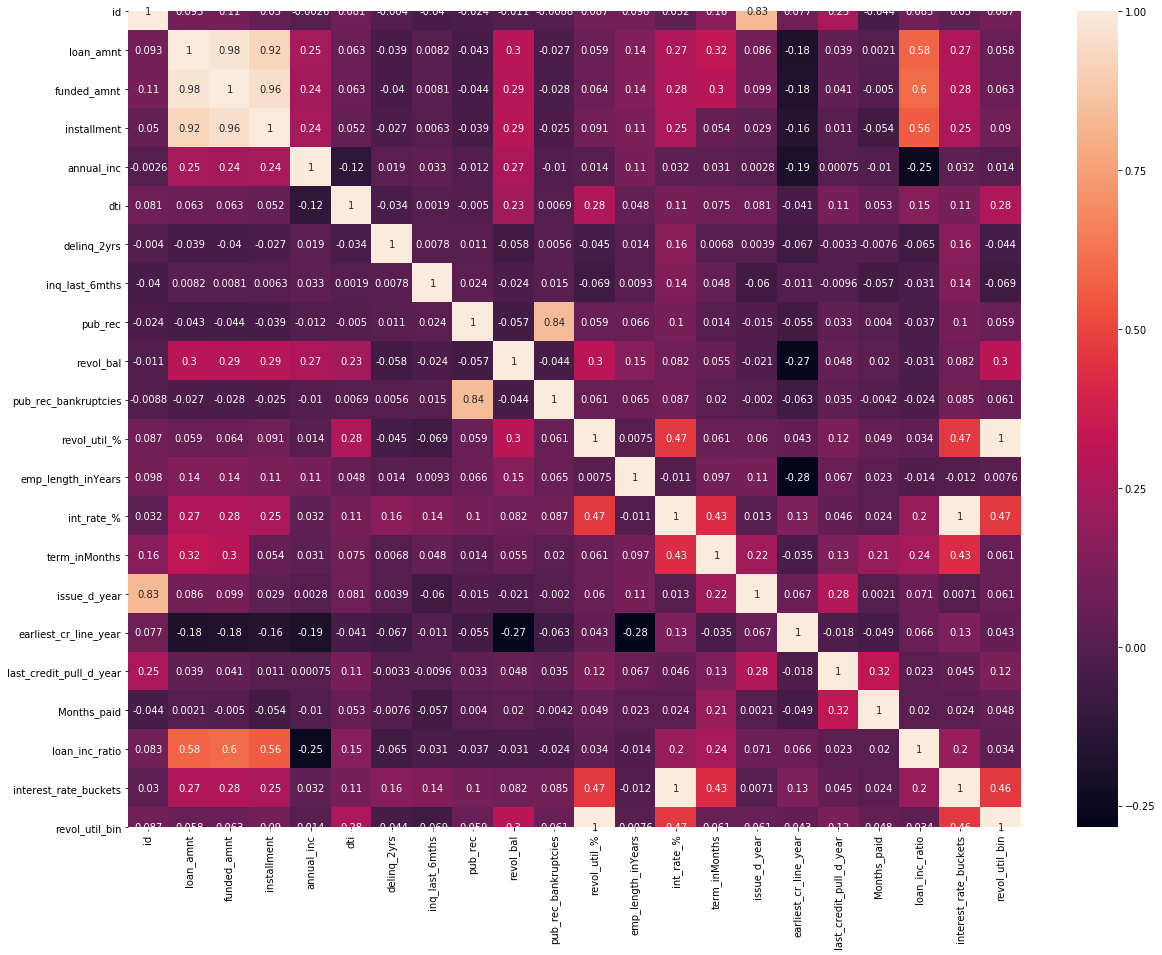

In [182]:
plt.figure(figsize=(20,15))
sns.heatmap(df_final.corr(),annot=True)
plt.show()